<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/Proyecto_final_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Vision_producto](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

#**PROYECTO INTEGRADOR FINAL: BANK TELEMARKETING**
El objetivo es predecir si un cliente se suscribirá a un depósito a plazo fijo que se le ofrece mediante una campaña de telemarketing.

Para ello se propone crear un modelo de clasificación de aprendizaje automático con la finalidad poder usarlo en una población definida por un banco minorista de Portugal en el contexto de la recesión global del año 2008.
[Link Product Vision Board](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

## **DESCRIPCION DE LOS DATOS**
**1. Información Importante:**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder saber si el cliente se suscribiría a un depósito a plazo fijo.





**2. Objetivo:**

El objetivo es diseñar un modelo de clasificación para predecir si el cliente suscribirá un depósito a plazo (variable y).

**3. Número de Instancias:**

45211 for bank-full.csv (4521 for bank.csv)

**4. Número de atributos:**

 16 varaibles de entrada

 1 variable de salida o variable Objetivo


**5. Información sobre las Variables:**

**Variables de Entrada**
1. age: Edad del cliente (numérico).

2. job: Tipo de empleo del cliente (categórico): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".

3. marital: Estado civil del cliente (categórico): "married", "divorced", "single" (Nota: "divorced" significa divorciado o viudo).

4. education: Nivel de educación del cliente (categórico): "unknown", "secondary", "primary", "tertiary".

5. default: ¿Tiene el cliente crédito en mora? (binario): "yes", "no".

6. balance: Saldo promedio anual, en euros, del cliente (numérico).

7. housing: ¿Tiene el cliente un préstamo hipotecario? (binario): "yes", "no".

8. loan: ¿Tiene el cliente un préstamo personal? (binario): "yes", "no".

9. contact: Tipo de comunicación de contacto (categórico) relacionado con el último contacto de la campaña actual: "unknown", "telephone", "cellular".

10. day: Último día del mes en que se realizó el último contacto (numérico).

11. month: Último mes del año en que se realizó el último contacto (categórico): "jan", "feb", "mar", ..., "nov", "dec".

12. duration: Duración del último contacto en segundos (numérico).

13. campaign: Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

14. pdays: Número de días transcurridos desde el último contacto de una campaña anterior con el cliente (numérico, -1 significa que el cliente no fue contactado anteriormente).

15. previous: Número de contactos realizados antes de esta campaña y para este cliente (numérico).

16. poutcome: Resultado de la campaña de marketing anterior (categórico): "unknown", "other", "failure", "success".

**Variable objetivo (target deseado):**

17. y: ¿El cliente ha suscrito un depósito a plazo? (binario): "yes", "no".



**6. Missing Attribute Values:**

None


In [145]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

# 1. Leyendo y explorando data

In [146]:
mainpath = "bank_full.csv"
data = pd.read_csv(mainpath,sep=";")
pddf= pd.read_csv(mainpath,sep=";")

In [147]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Se observó:**

10 variables categóricas

7 variables numéricas

# 1.1 Análisis de la Variable Objetivo (y)
¿El cliente invirtió en un depósito a plazo fijo? : yes / no


In [149]:
#La variable Objetivo de tipo categórica se mapea en 0=no , yes=1
data["y"].unique()
data["y"]=pddf["y"].map({'no':0, 'yes':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='count'>

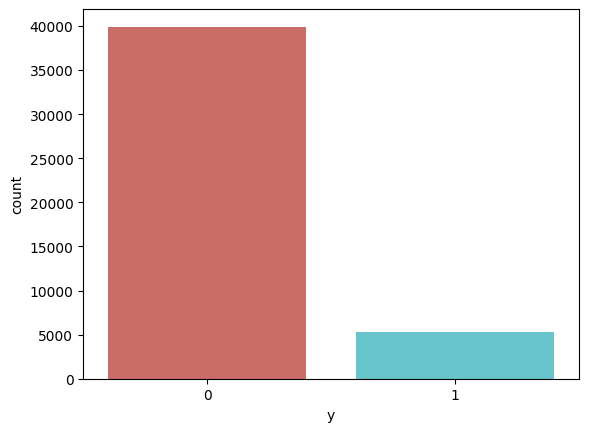

In [150]:
# Analizando la distribución de la variable objetivo.
sns.countplot(x='y', data = data, palette = 'hls')

In [151]:
#Media de la variable objetivo

print("Media de Y: ", data.y.mean(). round(3))
# Distribución de frecuencias de las respuestas a la suscripción de depósitos a plazo fijo (y)
frecuencias = data.groupby('y').agg({'y': ['count',  lambda x: 100*x.size/len(data)]})
frecuencias.columns = ['fi', 'hi%']
print("\nDistribución de frecuencias")
frecuencias


Media de Y:  0.117

Distribución de frecuencias


,fi,hi%
y,,
0,39922,88.30152
1,5289,11.69848


**Se observó:**

1. *La variable objetivo es Categórica binaria.*  Por lo tanto, para el modelo de clasificación se codificó así:

> 0='no'   No se suscribió a un depósito a plazo fijo.

> 1='yes'  Si se suscribió a un depósito a plazo fijo.

2. La Distribucipon de frecuencias de la variable objetiva nos muestra una data desbalanceada. 88.3% de la muestra no se suscribió a un depósito a plazo fijo. Esto se puede explicar por el contexto de la crisis financiera del 2008.

3. La media 0.117, nos indica que en promedio se suscribieron 12 de cada 100.


# 1.1. Análisis de las variables categóricas

In [152]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [153]:
categorical_columns =data.select_dtypes(include=['object'])
categorical_columns.describe().transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


In [ ]:
for column in categorical_columns:
    category_counts = data[column].value_counts(normalize=True)  # Calcular las frecuencias relativas
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    plt.title(f"Gráfico de barras - {column}")
    plt.xticks(rotation=30)

    # Mostrar las frecuencias relativas en las etiquetas de las barras
    for i, v in enumerate(category_counts.values):
        plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.show()

In [ ]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data, x=column,hue='y')
    plt.xticks(rotation='vertical')
    plt.show()

column_cat = data.select_dtypes(include='object').columns

for _ in column_cat:
    plot_categorial(_)

**Análisis de la relación entre variables categóricas y una variable objetivo**

 Tabla de contingencia y realizar un test de chi-cuadrado.

In [156]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
for column in categorical_columns:
  contingency_table = pd.crosstab(data[column], data['y'], normalize='index')*100
  print( "\n")
  print(contingency_table.sort_values(by=1, ascending=False))





y                      0          1
job                                
student        71.321962  28.678038
retired        77.208481  22.791519
unemployed     84.497314  15.502686
management     86.244449  13.755551
admin.         87.797331  12.202669
self-employed  88.157061  11.842939
unknown        88.194444  11.805556
technician     88.943004  11.056996
services       91.116996   8.883004
housemaid      91.209677   8.790323
entrepreneur   91.728312   8.271688
blue-collar    92.725031   7.274969


y                 0          1
marital                       
single    85.050821  14.949179
divorced  88.054542  11.945458
married   89.876534  10.123466


y                  0          1
education                      
tertiary   84.993610  15.006390
unknown    86.429725  13.570275
secondary  89.440565  10.559435
primary    91.373522   8.626478


y                0          1
default                      
no       88.203892  11.796108
yes      93.619632   6.380368


y                0 

**Se observó:**
Analizando la relación de las variables categóricas con la variable objetivo (y), tenemos:

1. En **Job:** La categoría "*student*" tiene la mayor probabilidad (28.7%) de suscribir un depósito a plazo fijo.
2. En **marital:** La categoría "*single*" tiene la mayor probabilidad (14.9%) de suscribir un depósito a plazo fijo.     
3. En **education:** La categoría "*tertiary*" tiene la mayor probabilidad (15%) de suscribir un depósito a plazo fijo.           


In [183]:
data.groupby('marital').agg(count=('y', 'count'), mean=('y', 'mean'))

,count,mean
marital,,
divorced,5207,0.119455
married,27214,0.101235
single,12790,0.149492


In [182]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
data.groupby('marital').agg({'y': 'mean'})
# En resumen, visualizamos que las personas solteras poseen un 14%
# que dieron la conformidad para brindarles el producto via telefónica.

,y
marital,
divorced,0.119455
married,0.101235
single,0.149492


In [158]:
# Ahora veamos con la variable "education" para ver las probabilidades que poseen:
data.groupby('education').agg({'y': 'mean'})
# Al ejecutar este análisis, se visualiza que los analfabetos son las personas que
# mas han estado interesadas en el producto.

,y
education,
primary,0.086265
secondary,0.105594
tertiary,0.150064
unknown,0.135703


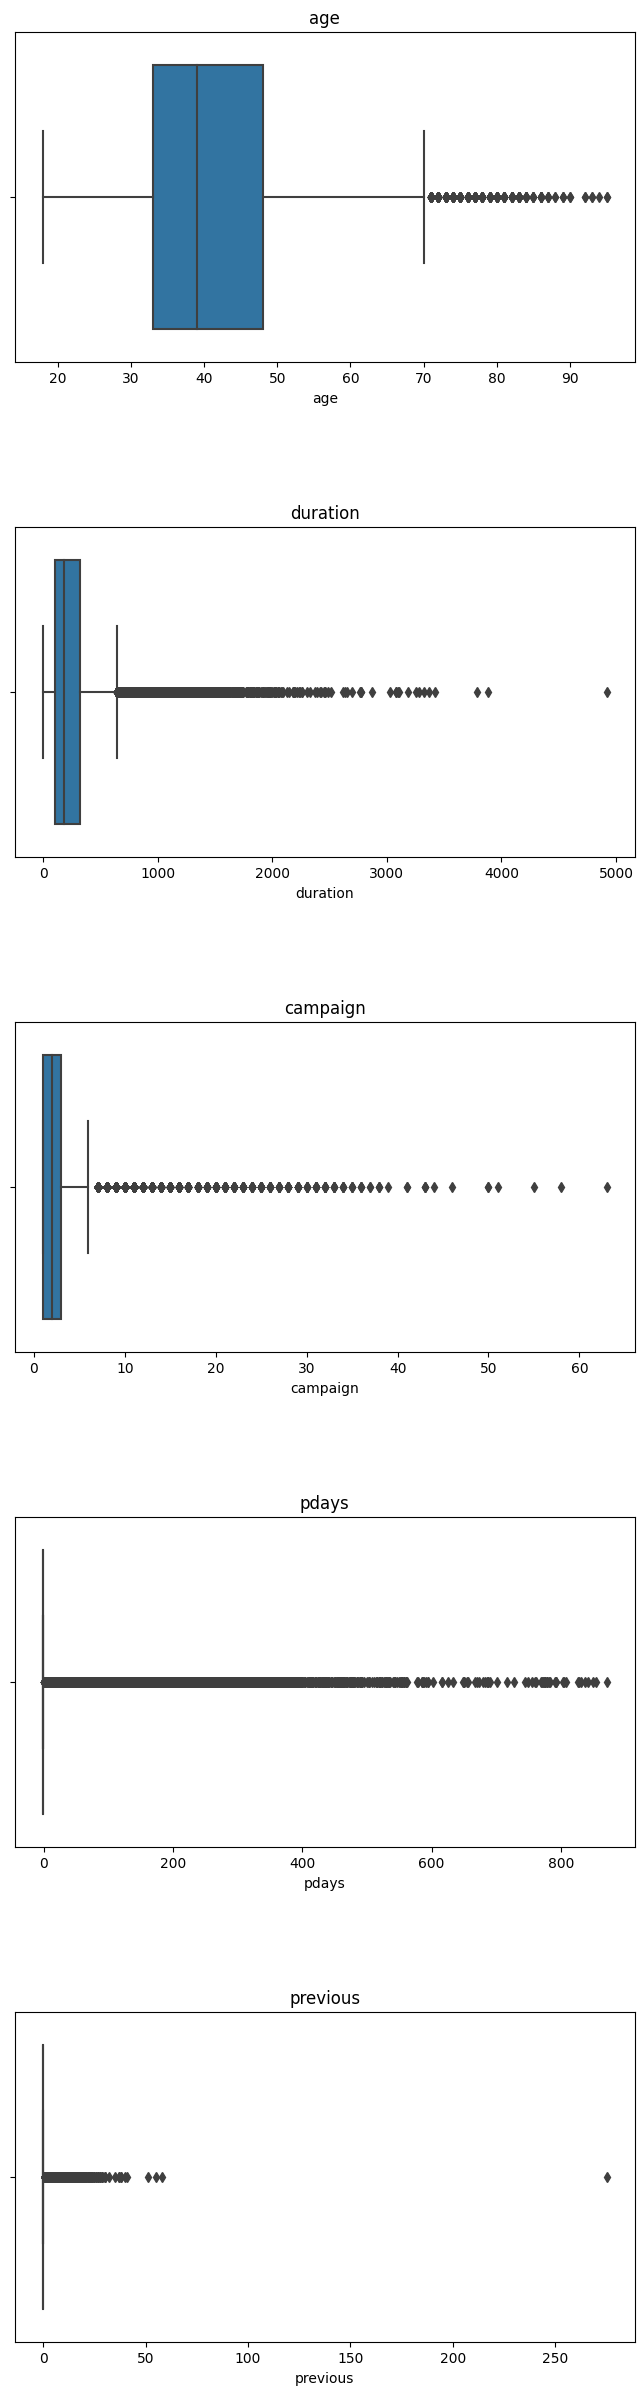

In [159]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# 1.2 Análisis de la variable numérica

In [160]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
#variables_numericas.remove(target)
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [161]:
numeric_columns = data.select_dtypes(include=['int64', 'float'])
numeric_columns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


# 2. Selección de muestras

In [164]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=123)

In [165]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 45211
Tamaño de train: 31647
Tamaño de test: 13564


# 3. Pre selección de variables

In [166]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0


In [167]:
# Procedemos con crear la columna missig para ver el porcentaje de valores perdidos:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0,0.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0,0.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0,0.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0,0.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0,0.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0,0.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0,0.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0


In [168]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [169]:
# Conteo de los niveles en las diferentes columnas categóricas:
# Como se verá en su ejecución, todas las variables categóricas poseen mas de 1 subnivel, por tal motivo no podremos a primera vista, eliminar alguna columna.
cols_cat = ['job','marital','education','default','housing','loan','contact','day','poutcome','y']
for col in cols_cat:
  print('Columna ', col, ': ' , data[col].nunique() ,  ' Subniveles')

Columna  job :  12  Subniveles
Columna  marital :  3  Subniveles
Columna  education :  4  Subniveles
Columna  default :  2  Subniveles
Columna  housing :  2  Subniveles
Columna  loan :  2  Subniveles
Columna  contact :  3  Subniveles
Columna  day :  31  Subniveles
Columna  poutcome :  4  Subniveles
Columna  y :  2  Subniveles


In [170]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [171]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45211, 17)
Tamaño del set después de eliminar las filas repetidas: (45211, 17)


# 4. Tratamiento de variables

In [172]:
train['poutcome'].value_counts()

unknown    25845
failure     3451
other       1292
success     1059
Name: poutcome, dtype: int64

In [173]:
train['poutcome'].drop_duplicates()

44828    success
11344    unknown
28435    failure
40225      other
Name: poutcome, dtype: object